# Neuronale Netzwerke

## Grundlagen

Ein neuronales Netzwerk kann in vielerlei Hinsichten mit einem Gehirn verglichen werden. Ähnlich wie das Gehirn besteht ein neuronales Netzwerk aus vielen Neuronen. Es gibt verschiedene Arten von Neuronen, die wiederum unterschiedliche Aktivierungsfunktion besitzen. Auf Aktivierungsfunktionen wird in einem späteren Teil der Arbeit genauer eingegangen.
Grundsätzlich besitzt jedes Neuron Eingabezahlen (x1, x2, …) die mit Gewichten (w1, w2, …) verbunden sind. Noch dazu besitzt jedes Neuron ein Bias (b). All diese Faktoren haben Einfluss auf den Ausgabewert eines Neurons. Um diesen zu berechnen, wird die gewichtete Summe der Eingabewerte mit dem Bias addiert. Mathematisch kann diese Berechnung folgendermaßen dargestellt werden: $\sum_{j=1} {w_j x_j + b}$ (vgl. Nielsen, 2015, #Perceptrons) 

Mit einem einzelnen Neuron kann nicht viel angefangen werden, deswegen verbindet man die Neuronen miteinander, wodurch ein neuronales Netzwerk entsteht. Es gibt viele verschiedene Arten von neuronalen Netzwerken, das einfachste davon ist das sogenannte "Feedforward Neural Network".
Bei dieser Variante werden Informationen kontinuierlich, d.h. ausschließlich von einer Schicht zur nächsthöheren, weitergeleitet. Es kann in drei Teile unterteilt werden: die Eingabeschicht, die verborgenen Schichten und die Ausgabeschicht. (ebd.)


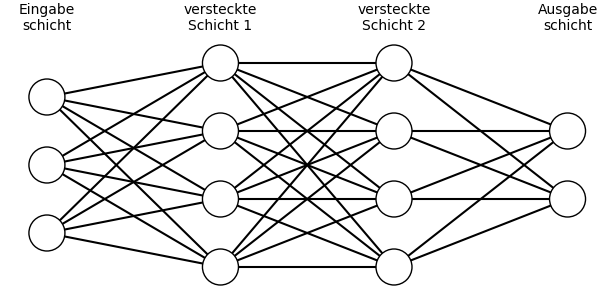

In [1]:
# Zeichne Netzwerk mit Code

from io import BytesIO
import matplotlib.pyplot as plt
from src.erstelle_netzwerk import zeichne_netzwerk
from src.hilfsfunktionen import erstelle_bild

grosse = 6
y_ratio = 0.5
zeichne_netzwerk(grosse, y_ratio, [3, 4, 4, 2])

bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()

erstelle_bild(bild, 500, "Neuronales Netzwerk")


### Die Eingabeschicht

Die Eingabeschicht empfängt die Daten von externen Quellen. Bei einem Zahlenerkennungsmodell beispielsweise würde die Eingabeschicht die Pixeldaten des Bildes repräsentieren. Dementsprechend würde ein 28x28-Bild 784 Eingabeneuronen benötigen. (vgl. Lheureux, o.J.)

### Die verborgenen Schichten

Die verborgenen Schichten sind das, was neuronale Netzwerke so besonders macht. Sie verbinden die Eingabeschicht und die Ausgabeschicht miteinander. Je nach Schwierigkeitsgrad der Anwendung werden mehr und längere verborgene Schichten benötigt. Je mehr verborgene Neuronen es gibt, desto kompliziertere Berechnungen kann das neuronale Netzwerk durchführen. (ebd.)

### Die Ausgabeschicht

Die Ausgabeschicht gibt die endgültige Ausgabe des neuronalen Netzwerkes zurück. In dem Zahlenerkennungsmodell wären das die Ziffern 0 bis 9. (ebd.)

## Vorwärtspropagierung

### Skalarprodukt

In Vorwärtspropagierung werden die Eingabedaten des neuronalen Netzwerkes zur nächsten Schicht weitergegeben, bis sie zur Ausgabeschicht kommen und ein Ergebnis liefern. (vgl. Anshumanm2fja, 2024)

Um das neuronale Netzwerk in der Programmierung umzusetzen, verwende ich die Programmiersprache Python zusammen mit dem Paket "NumPy". Ein neuronales Netzwerk mit zwei Eingabeneuronen und einem Ausgabeneuron kann wie folgt dargestellt werden:

In [2]:
import numpy as np

eingaben = [0.3, 0.6]
gewichte = [0.8, 0.2]
bias = 4

ausgabe = eingaben[0] * gewichte[0] + eingaben[1] * gewichte[1] + bias
print(ausgabe)

4.36


Im Folgenden wird auch noch die Ausgabe eines neuronalen Netzwerkes mit zwei Eingabeneuronen und zwei Ausgabeneuronen programmatisch umgesetzt.'

In [3]:
eingaben = [1.2, 3.2]
gewichte1 = [0.8, 1.3] # Gewichte zwischen dem ersten Eingabe- und Ausgabeneuron
gewichte2 = [3.1, 1.6] # Gewichte zwischen dem zweiten Eingabe- und Ausgabeneuron

bias1 = 4
bias2 = 3

ausgabe1 = eingaben[0] * gewichte1[0] + eingaben[1] * gewichte1[1] + bias1
ausgabe2 = eingaben[0] * gewichte2[0] + eingaben[1] * gewichte2[1] + bias2
print(ausgabe1, ausgabe2)

9.120000000000001 11.84


Jedoch ist diese Schreibweise sehr mühsam und ineffizient, weswegen zur Berechnung der Ausgabe Vektoren und Matrizen zusammen mit dem Skalarprodukt verwendet werden.

In [4]:
eingaben = [1.2, 3.2]
gewichte = [
    [0.8, 1.3],
    [3.1, 1.6],
]
bias = [4, 3]

ausgabe = np.dot(gewichte, eingaben) + bias
print(ausgabe)

[ 9.12 11.84]


### Batches

Bis jetzt rechnet der Code jeweils nur eine Schicht pro Zyklus (Batch) aus. Um die Effizienz zu steigern, werden pro Zyklus mehrere Batches gemacht; das bietet den Vorteil der Parallelisierung von Operationen. Das Lernen von neuronalen Netzwerken wird in der Praxis mit GPUs (Graphics Processing Units) durchgeführt. GPUs besitzen eine hohe Anzahl an Prozessoren, wodurch auch aufwendige Berechnungen schnell durchgeführt werden können. Eine weitere essenzielle Eigenschaft von Batches ist die Normalisierung. Wenn mehrere Schichten gleichzeitig ausgeführt werden, kann die Schwankung der Ausgabewerte ausbalanciert werden; dadurch wird das Lernen stabiler und konsistenter.
(vgl. Kinsley, 2020, TC: 8:00)

Um Batches zu implementieren, wird die Eingabeliste in eine zweidimensionale Liste konvertiert:

In [5]:
eingaben = [
    [1.2, 3.2],
    [3.2, 1.2],
    [4.2, 0.2],
    [3.1, 2.2],
]

ausgabe = np.dot(gewichte, eingaben) + bias

ValueError: shapes (2,2) and (4,2) not aligned: 2 (dim 1) != 4 (dim 0)

Der Code liefert jetzt allerdings einen Fehler:


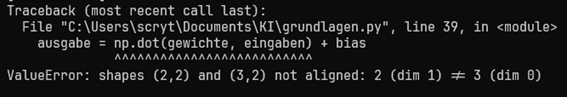

In [6]:
# Zeige den Error Fehler / lade gespeichertes Bild

with open("VWA/Batch-Code-Fehler.png", "rb") as bild_datei:
    erstelle_bild(bild_datei, 500, "Batch-Code-Fehler")

Dieser Fehler tritt auf, da bei der Matrixmultiplikation die Reihenfolge der Parameter zu beachten ist. Wird die Anzahl der Eingabeneuronen auf drei erhöht, so tritt ein ähnlicher Fehler auf. Das hat mit der Durchführung der Matrixmultiplikationen zu tun. Bei dieser werden die Zeilen mit den Reihen multipliziert; da allerdings in diesem Fall die Reihen und die Spalten unterschiedliche Längen haben, können die Multiplikationen nicht durchgeführt werden. Um diesen Fehler zu beheben, muss die Matrix transponiert werden, d.h., Zeilen und Reihen werden vertauscht. (vgl. Kinsley, 2020, TC: 16:26)

In [7]:
transponierte_gewichte = np.array(gewichte).T
ausgabe = np.dot(eingaben, transponierte_gewichte) + bias
print(ausgabe)

[[ 9.12 11.84]
 [ 8.12 14.84]
 [ 7.62 16.34]
 [ 9.34 16.13]]


Um weitere Schichten hinzuzufügen, kann der bereits vorhandene Code wiederverwendet werden. Um dies effizient umzusetzen, bietet es sich an, Klassen zu schreiben. Die Klasse "Schicht" dient hier als Bauplan für alle Schichten, die instanziiert werden, in diesem Fall "schicht1" und "schicht2".

In [8]:
class Schicht:
    def __init__(self, anzahl_eingaben, anzahl_neuronen):
        self.gewichte = 0.1 * np.random.randn(anzahl_eingaben, anzahl_neuronen)
        self.bias = 0.1 * np.random.randn(1, anzahl_neuronen)

    def vorwaerts(self, eingaben):
        self.gespeicherte_eingaben = eingaben
        ausgaben = np.dot(eingaben, self.gewichte) + self.bias
        return ausgaben


schicht1 = Schicht(2, 4)
schicht2 = Schicht(4, 5)

ausgaben1 = schicht1.vorwaerts(eingaben)
ausgaben2 = schicht2.vorwaerts(ausgaben1)
print(ausgaben2)

[[ 0.19723736  0.20756339 -0.23367382  0.03230019  0.16130529]
 [ 0.14610484  0.16904855 -0.18300431  0.04532478  0.14130042]
 [ 0.12053858  0.14979113 -0.15766956  0.05183708  0.13129798]
 [ 0.17542704  0.19595888 -0.23426975  0.04478193  0.158071  ]]


Die Ausgaben der ersten Schicht werden als Eingaben für die zweite Schicht verwendet, um dann mit dieser die Ausgabeneuronen des Netzwerkes zu berechnen.

## Regression vs Klassifizierung

Für die späteren Kapitel ist es wichtig zwischen Regressions- und Klassifizierungsproblemen zu unterscheiden. Regression ist eine überwachte Lernmethode. Sie wird verwendet, um kontinuierliche numerische Werte vorherzusagen. Dabei wird eine Beziehung zwischen Eingangsvariablen und Ausgabewerten hergestellt. Typische Anwendungen umfassen zum Beispiel die Vorhersage von Verkaufszahlen, Temperaturen oder Immobilienpreisen. (vgl. Saxena, 2024)

Klassifizierung ist ebenfalls eine überwachte Lernmethode setzt sich hingegen damit auseinander, Eingabedaten in diskrete Kategorien einzuteilen. Typische Anwendungen sind die Bilderkennung oder die Spam-Erkennung. (ebd.)

## Aktivierungsfunktionen

Ein neuronales Netzwerk ist im Wesentlichen eine Funktionsannäherung. Aktivierungsfunktionen ermöglichen es neuronalen Netzwerken, nicht-lineare Beziehungen zwischen Daten zu modellieren. Ein Neuron ohne Aktivierungsfunktion ist eine lineare Funktion. Besteht ein neuronales Netzwerk nur aus solchen Neuronen, dann kann dieses Netzwerk sich nur an lineare Funktionen annähern und besitzt somit nicht die Fähigkeit, komplexere Funktionen wie eine Sinusfunktion zu approximieren. (vgl. Kinsley, 2020, 7:47)


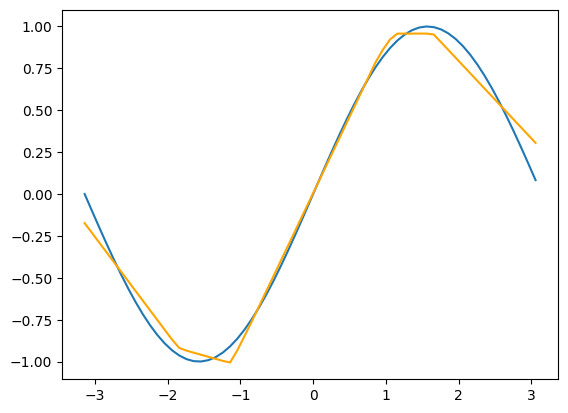

In [9]:
# Zeichne Sinus Funktionsannäherung mit Code

from matplotlib import animation
import matplotlib.pyplot as plt
from src import sin
import numpy as np
from io import BytesIO
from src.hilfsfunktionen import erstelle_bild
import math

sin_eingaben = np.arange(-math.pi, math.pi, 0.1)
sin_eingaben = sin_eingaben.reshape(len(sin_eingaben), 1)
ziele = np.sin(sin_eingaben)

netzwerk,_ = sin.trainiere_netzwerk(sin_eingaben, ziele)

vorhersagen = netzwerk.vorwaerts_durchlauf(sin_eingaben)
plt.plot(sin_eingaben, ziele, label="Wahre Funktion")
plt.plot(sin_eingaben, vorhersagen, label="Neuronales Netzwerk", color="orange")

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches='tight')
bild.seek(0)
plt.close()

erstelle_bild(bild, 400, "Lineare Funktionsannäherung einer Sinuskurve")

Um dieses Problem zu lösen, werden auf das Ergebnis der Neuronen Aktivierungsfunktionen angewendet. Es gibt verschiedene Arten von Aktivierungsfunktionen, zwei weit verbreitete und beliebte sind die Sigmoid-Funktion und ReLU(rectified linear unit)-Funktion. (vgl. Kinsley, 2020, TC: 7:52)

### Die Sigmoid-Funktion

Die Sigmoid-Funktion ist eine mathematische Funktion, die den Wertebereich zwischen zwei Zahlen, beschränkt und eine S-förmige Kurve bildet. Es gibt verschiedene Varianten der Sigmoid-Funktion. Ein Beispiel dafür ist die Logistische Sigmoid-Funktion. Im Kontext des maschinellen Lernens wird die Logistische Sigmoid-Funktion auch oft als Sigmoid-Funktion bezeichnet. Mathematisch wird diese Funktion durch folgende Gleichung beschrieben:  $\sigma(x) = \frac{1}{1 +e^{-x}}$ (vgl. Topper, 2023)

Um die Aktivierungsfunktion an Schichten von Neuronen anzuwenden, erstelle ich die Klasse "Sigmoid".

In [10]:
class Sigmoid:
    def vorwaerts(self, eingaben):
        self.gespeicherte_ausgaben = 1 / (1 + np.exp(-eingaben))
        return self.gespeicherte_ausgaben


schicht1 = Schicht(2, 4)
aktivierung1 = Sigmoid()

rohe_ausgaben = schicht1.vorwaerts(eingaben)
aktivierte_ausgaben = aktivierung1.vorwaerts(rohe_ausgaben)
print(aktivierte_ausgaben)

[[0.55333703 0.40102532 0.51820554 0.5063808 ]
 [0.61374165 0.43124427 0.4485177  0.50648541]
 [0.64279591 0.44656306 0.41425093 0.50653771]
 [0.60990116 0.40875704 0.46481419 0.49837571]]


### Die ReLU-Funktion

Eine weitere Aktivierungsfunktion ist die ReLU-Funktion. Der Vorteil der ReLU-Funktion gegenüber anderen Aktivierungsfunktionen ist ihre Effizienz.
Ihre Funktionsweise ist einfach: Ist ein Wert positiv, wird der Wert beibehalten, ansonsten wird der Wert gleich 0 gesetzt. (vgl. Kinsley, 2020, TC: 9:00)

In [11]:
class ReLU:
    def vorwaerts(self, eingaben):
        self.gespeicherte_eingaben = eingaben
        ausgaben = np.maximum(0, eingaben)
        return ausgaben

### Die Softmax-Funktion

Die Softmax-Funktion ist eine weitere Aktivierungsfunktion, die aber in der Ausgabeschicht bei Klassifizierungsproblemen durchgeführt wird. Sie transformiert die Rohwerte in Wahrscheinlichkeiten, die zusammen 1 ergeben. Dies ermöglicht es, die Ausgaben des neuronalen Netzwerkes als Wahrscheinlichkeiten für die möglichen Kategorien zu interpretieren. (vgl. Belagatti, 2024)

Die Softmax-Funktion exponiert die Ausgaben mit Hilfe der exponentiellen Funktion $e^y$. Anschließend werden diese Werte normalisiert in dem sie durch die Summe aller exponierte Werte dividiert werden. Die mathematische Formel sieht dann so aus: $a_i = \frac {e^{z_i}} {\sum_{j=1} {e^{z_j}}}$
(ebd.)

So wie bei der der Sigmoid-Funktion und der ReLU-Funktion erstelle ich auch für die Softmax-Funktion eine Klasse.

In [12]:
class Softmax:
    def vorwaerts(self, eingaben):
        exponierte_werte = np.exp(eingaben - np.max(eingaben, axis=1, keepdims=True))
        summe = np.sum(exponierte_werte, axis=1, keepdims=True)
        normalisierte_ausgaben = exponierte_werte / summe
        return normalisierte_ausgaben

## Die Netzwerk-Klasse

Um die verschiedenen Komponenten des neuronalen Netzwerkes, wie die Schichten und Aktivierungsfunktionen, effizient zu verwalten, erstelle ich die Netzwerk Klasse. Die Klasse besteht aus einer Liste von Schichten und einer Liste von Aktivierungsfunktionen. Zusätzlich enthält sie die Methode \glqqvorwaerts_durchlauf" um eine Vorwärtspropagierung  durchzuführen. Dabei wird schichtweise die rohen Ausgaben jeder Schicht berechnet und dann mit der entsprechenden Aktivierungsfunktion aktiviert. Das endgültige Ergebnis in der letzten Schicht ist die Ausgabe des neuronalen Netzwerkes und wird zurückgegeben. Mit der Methode "schicht_hinzufuegen" werden Schichten und deren entsprechende Aktivierungsfunktion an dem Netzwerk hinzugefügt.

In [13]:
class Netzwerk:
    def __init__(
        self,
    ):
        self.schichten = []
        self.aktivierungsfunktionen = []

    def schicht_hinzufuegen(self, schicht, aktivierung):
        self.schichten.append(schicht)
        self.aktivierungsfunktionen.append(aktivierung)

    def vorwaerts_durchlauf(self, eingaben):
        aktuelle_eingaben = eingaben
        for schicht, aktivierung in zip(self.schichten, self.aktivierungsfunktionen):
            rohe_ausgaben = schicht.vorwaerts(aktuelle_eingaben)
            aktivierte_ausgaben = aktivierung.vorwaerts(rohe_ausgaben)
            # Aktivierte Ausgaben der Schicht werden zu Eingaben für die nächste Schicht
            aktuelle_eingaben = aktivierte_ausgaben
        return aktivierte_ausgaben


netzwerk = Netzwerk()
netzwerk.schicht_hinzufuegen(
    Schicht(1, 5),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
netzwerk.schicht_hinzufuegen(
    Schicht(5, 2),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

Als Beispiel erstelle ich ein Netzwerk das aus 1 Eingabeneuron, 5 versteckte Neuronen und 2 Ausgabeneuronen besteht.

## Das Zahlungserkennungsmodell

Um ein neuronales Netzwerk zu trainieren, werden Daten benötigt. Für ein Modell, das zu der Erkennung von Zahlen dient, eignet sich die MNIST-Datenbank. MNIST enthält 60.000 Trainingsbilder und 10.000 Testbilder von handgeschriebenen Ziffern und kann somit zum Trainieren als auch für die Evaluierung verwendet werden. (vgl. Khan, 2024)

Für mein neuronales Netzwerk verwende ich für die Eingabeschicht 784 Neuronen, da die MNIST Bilder aus 28 mal 28 Pixels bestehen. Ich habe eine verborgene Schicht mit 
20 Neuronen mit der ReLU-Aktivierungsfunktion. Die Ausgabeschicht besteht aus zehn Neuronen, die jeweils die Ziffern 0 bis 9 repräsentieren. Da es sich hier um ein Klassifizierungsproblem handelt, verwende ich für die Ausgabeschicht die Softmax-Funktion.

In [14]:
from daten.lade_daten import lade_test_daten
import random

netzwerk = Netzwerk()
netzwerk.schicht_hinzufuegen(
    Schicht(784, 20),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
netzwerk.schicht_hinzufuegen(
    Schicht(20, 10),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

bilder, beschriftungen = lade_test_daten()
vorhersagen = netzwerk.vorwaerts_durchlauf(bilder) # Als Wahrscheinlichkeitsverteilung

vorhergesagte_ziffern = np.argmax(vorhersagen, axis=1)
tatsaechliche_ziffern = np.argmax(beschriftungen, axis=1)

vergleich = vorhergesagte_ziffern == ziele
richtige_aussagen = sum(vergleich)
genauigkeit = richtige_aussagen / 10_000
print(genauigkeit)

[0. 0. 0. ... 0. 0. 0.]


Zuerst werden die Bilder und deren Beschriftungen geladen. Anschließend berechnet das neuronale Netzwerk Vorhersagen basierend auf den Bilddaten und gibt diese als Wahrscheinlichkeitsverteilung zurück. Die Ziffer mit der höchsten Wahrscheinlichkeit wird dann mit der tatsächlichen Ziffer verglichen. Um die Genauigkeit zu bestimmen, werden die richtigen Aussagen mit der gesamten Anzahl an Testbildern dividiert. Da das Netzwerk noch nicht trainiert wurde, ist die Genauigkeit sehr niedrig.

# Trainieren eines neuronalen Netzwerkes

## Deep- und Shallow-Learning

Deep Learning und Shallow Learning sind Teilbereiche des maschinellen Lernens und befassen sich mit dem Trainieren neuronaler Netzwerke. "Shallow Learning" wird verwendet, flache ("shallow") neuronale Netzwerke zu trainieren, die in der Regel aus zwei oder drei Schichten bestehen. "Deep Learning" hingegen wird bei tiefen ("deep") neuronale Netzwerke angewendet, um Netzwerke mit mehr als zwei versteckten Schichten zu trainieren. (vgl. Lodhi, o.J.)

Flache neuronale Netzwerke sind aufgrund ihrer vereinfachten Architektur schneller und einfacher zu trainieren. Allerdings eignen sie sich daher weniger gut für komplexe Probleme. Tiefe Netzwerke hingegen können durch ihre komplexe Struktur anspruchsvolle Probleme lösen, erfordern jedoch zusätzliche Methoden um Problemen wie Überanpassung zu vermeiden. (ebd.)

Bei dem im vorherigen Kapitel angesprochenen Zahlungserkennungsmodell handelt es sich um ein flaches neuronales Netzwerk, da es nur eine versteckte Schicht besitzt.

## Die Verlust- und Kostenfunktion

Die Begriffe Verlustfunktion und Kostenfunktion werden oft synonym verwendet, haben jedoch grundlegend verschiedene Bedeutungen. Die Verlustfunktion ("Loss Function") dient dazu, die Leistung einer einzelnen Vorhersage zu bewerten. Sie berechnet mithilfe der Vorhersage und dem tatsächlichen Zielwert den Fehler des Netzwerkes für einen einzelnen Trainingsbeispiel. (vgl. Alake, o.J.)

Die Kostenfunktion ("Cost Funktion") hingegen ist der Mittellwert der Verlustfunktion für das gesamte Trainingsset. Sie berechnet die Gesamtleistung des neuronalen Netzwerkes und ist essenziell für das Training. Im Folgenden wird deutlich, wie sie zur Optimierung des Netzwerkes genutzt wird. Das Ziel des Netzwerkes ist es, die Kosten zu minimieren, um die Genauigkeit der Vorhersagen zu verbessern. (ebd.)

Es gibt verschiedene Arten von Kostenfunktionen, die je nach Aufgabe oder Problem in zwei Kategorien eingeteilt werden können: Kostenfunktionen für Regressionsprobleme und Kostenfunktionen für Kategorisierungsprobleme. (ebd.)

### Kostenfunktionen für Regressionsprobleme

Typische Kostenfunktionen für Regressionsprobleme sind der mittlere absolute Fehler (Mean Absolute Error, kurz MAE) und der mittlere quadratische Fehler (Mean Squared Error). Beim mittleren absoluten Fehler wird der Mittelwert die absoluten Differenzen zwischen der Vorhersage und dem tatsächlichen Zielwert berechnet. Mathematisch wird sie so dargestellt: $MAE= {\frac {1} {n}} {\sum_{i=1}^{n} |y_i - \hat{y_i}}|$, wobei n für die Anzahl an Trainingsbeispielen ist, $y_i$ für einen vorhergesagten Wert für ein bestimmtes Trainingsbeispiel ist und $\hat{y_i}$ der tatsächliche Zielwert für dieses Trainingsbeispiel. (vgl. Alake, o.J.)

Beim mitleren quadratischen Fehler (Mean Squared Error, kurz MSE) hingegen werden die quadratische Differenzen zwischen Vorhersage und dem tatsächlichen Zielwert berechnet. Mathematisch sieht das so aus: $MSE = {\frac {1} {n}} {\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$. Durch die quadratisierung werden größere Differenzen stärker bestraft. (ebd.)

In [15]:
class MittlererQuadratischerFehler:
    def kosten(vorhersagen, ziele):
        verluste = np.square(vorhersagen - ziele)
        kosten = np.mean(verluste)
        return kosten

Für mein Programm werde ich den mittleren quadratischen Fehler verwenden. Zuerst werden die Verluste berechnet, indem ich die Vorhersagen von den Zielen subtrahiere und dann die Ergebnisse mit "np.square" quadriere. Danach berechne ich den Mittelwert aller Verluste und gebe diesen aus. 

### Kostenfunktionen für Klassifizierungsprobleme

Eine typische Kostenfunktionen für Klassifizierungsprobleme ist der Kreuzentropie (Categorical Cross Entropy Loss, kurz CCE). Um den Verlust eines einzelnen Trainingsbeispiel $i$ zu erhalten, wird die negative Summe aller tatsächlichen Zielwerte multipliziert mit den jeweiligen logerierten Vorhersagen berechnet: $L_i = -{\sum_{j=1}^{C} \hat{y}_{i,j} \log(y_{i,j}})$ wobei C hier für die Anzahl an Kathegorien steht. Um die Kosten für alle Trainingsbeispiele zu berechnen wird der mittelwert aller Verluste wie bei den anderen Kostenfunktionen berechnet. $CCE = {\frac {1} {n}} {\sum_{i=1}^{n} {L_{i}}}$ (vgl. Gómez Bruballa, 2018)

In [16]:
class Kreuzentropie:
    @staticmethod
    def kosten(vorhersagen, ziele):
        vorhersagen = np.clip(vorhersagen, 1e-7, 1 - 1e-7)
        verluste = -np.sum(ziele * np.log(vorhersagen), axis=1)
        kosten = np.mean(verluste)
        return kosten

Für mein Zahlungserkennungsmodell werde ich des Weiteren den Kreuzentropie verwenden. Zuerst begrenze ich die Vorhersagen, damit die Werte nicht zu nah an 0 oder 1 sind, um beim Logarithmieren Verzerrungen des Ergebnisses zu vermeiden. Danach berechne ich die Verluste in dem ich mit np.log die Vorhersagen logarithmiere und dann mit den Zielen multipliziere. Die Ergebnisse werden über alle Klassen mit "np.sum" summiert. Um die Kosten zu berechnen verwende ich wieder "np.mean" um den Mittellwert aller Verluste zu berechnen.

## Gradientenabstieg

Gradientenabstieg (Gradient Descent, DC) ist ein Optimierungsalgorithmus. Er wird verwendet, um lokale Minimumstellen einer Funktion iterativ zu approximieren. Im Bereich des maschinenellen Lernens wird der Gradientenabstieg verwendet, um die Parameter eines neuronalen Netzwerks, also die Gewichte und Bias-Werte, iterativ so anzupassen, dass die Kostenfunktion minimiert wird. Der Algorithmus kann sich wie ein Ball auf einer Landschaft vorgestellt werden, schrittweise den Hügel hinunterrollt (vgl. Singh, 2025)


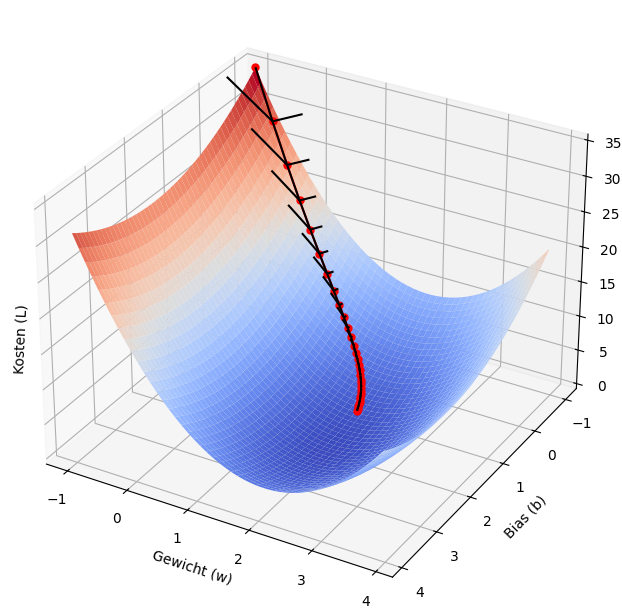

In [17]:
# Zeichne Kostenlandschaft mit Code

import numpy as np
import matplotlib.pyplot as plt
from neuronales_netzwerk.verlustfunktionen import MittlererQuadratischerFehler

def f(x):
    return 2 * x + 2


eingaben = np.arange(-3, 3, 0.1)
ziele = f(eingaben)


def berechne_kostenfunktion_auf_gewicht_bias(gewichte, bias):
    vorhersagen = gewichte * eingaben + bias
    verlust = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)
    return verlust


def berechne_gradient(gewicht, bias):
    vorhersagen = gewicht * eingaben + bias
    verlust_gradient = MittlererQuadratischerFehler.rueckwaerts(vorhersagen, ziele)

    gradient_gewicht = np.dot(eingaben.T, verlust_gradient)
    gradient_bias = np.sum(verlust_gradient)
    return [gradient_gewicht, gradient_bias]


def zeichne_landschaft():
    gewichtsbereich = np.arange(-1, 4, 0.1)
    biasbereich = np.arange(-1, 4, 0.1)
    gewichte, bias = np.meshgrid(gewichtsbereich, biasbereich)
    verluste = np.array(
        [
            [
                berechne_kostenfunktion_auf_gewicht_bias(gewicht, bias_wert)
                for gewicht in gewichtsbereich
            ]
            for bias_wert in biasbereich
        ]
    )

    ax.plot_surface(
        gewichte,
        bias,
        verluste,
        cmap="coolwarm",
    )  # Kostenlandschaft

def berechne_hinunterrollen():
    geschichte = []
    gewicht = -1  # Start Gewicht
    bias = -1  # Start Bias
    for _ in range(30):
        vorhersagen = gewicht * eingaben + bias
        kosten = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)

        geschichte.append((gewicht, bias, kosten))

        gradient = berechne_gradient(gewicht, bias)
        gewicht -= 0.02 * gradient[0]
        bias -= 0.02 * gradient[1]

    return geschichte


def zeichne_hinunterrollen(punkte):
    gewichte = [p[0] for p in punkte]
    bias = [p[1] for p in punkte]
    kosten = [p[2] for p in punkte]
    ax.plot(
        gewichte,
        bias,
        kosten,
        color="red",
        marker="o",
        markersize=5,
        label="Descent Path",
    )
    for i in range(len(punkte) - 1):
        gewicht, bias, kosten = punkte[i]
        dgewicht = punkte[i + 1][0] - gewicht
        dbias = punkte[i + 1][1] - bias
        dkosten = punkte[i + 1][2] - kosten
        ax.quiver(
            gewicht,
            bias,
            kosten,
            dgewicht,
            dbias,
            dkosten,
            arrow_length_ratio=0.5,
            color="black",
        )


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d", computed_zorder=False)
#ax = fig.add_axes((-0.15, 0.05, 1, 1),projection="3d", computed_zorder=False)

zeichne_landschaft()
geschichte = berechne_hinunterrollen()
zeichne_hinunterrollen(geschichte)

# Achsentitel
ax.set_xlabel("Gewicht (w)")
ax.set_ylabel("Bias (b)")
ax.invert_yaxis()
ax.set_zlabel("Kosten (L)", labelpad=-260)

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches='tight', pad_inches=0)
bild.seek(0)
plt.close()

erstelle_bild(bild, 400, "Kostenlandschaft in Bezug auf Gewichte und Bias")

Der Algorithmus berechnet dabei zuerst den Gradienten. Der Gradient einer Funktion gibt an, in welcher Richtung und mit welcher Stärke die Funktion am stärksten ansteigt. Um also die Kostenfunktion zu minimieren, werden die Parameter mit dem negativen Gradient addiert. Um den Gradienten einer Kostenfunktion zu berechnen, werden die partiellen Ableitungen der Kostenfunktion nach den Gewichten und Bias-Werten berechnet. (ebd.)

Die Kostenfunktion besteht aus der Vorhersage und dem tatsächlichen Zielwert. Die Gewichte und Bias-Werte beeinflussen die Vorhersage und haben demnach einen Einfluss auf die Kostenfunktion. Allerdings tragen manche Parameter stärker zur Veränderung der Kostenfunktion bei als andere. Deshalb werden die Parameter proportional zu ihrer Änderungsrate angepasst. Die Partielle Ableitung zeigt an, wie stark eine kleine Änderung eines Parameters die Kostenfunktion verändert. Gewichte, die zu einem hohen Kostenanstieg führen, werden stärker reduziert um den Fehler zu verringern, während Gewichte, die eine geringere Auswirkung haben, nur weniger stark angepasst werden. Noch dazu werden die Veränderungen mit einem Wert namens Lernrate multipliziert, um zu starkes herum springen zu vermeiden. (ebd.)


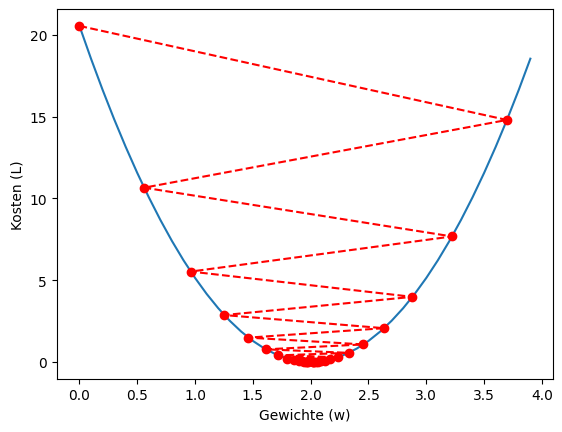

In [18]:
# Zeichne Gewichtsaktualisierung mit Code

import numpy as np
import matplotlib.pyplot as plt
from neuronales_netzwerk.verlustfunktionen import MittlererQuadratischerFehler


def f(x):
    return 2 * x


eingaben = np.arange(0, 4, 0.1)
ziele = f(eingaben)


def berechne_kostenfunktion_auf_gewicht(gewichte):
    kosten_gewicht = []
    for gewicht in gewichte:
        vorhersagen = gewicht * eingaben
        kosten = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)
        kosten_gewicht.append(kosten)
    return kosten_gewicht


def berechne_gradient(gewicht):
    vorhersagen = gewicht * eingaben
    verlust_gradient = MittlererQuadratischerFehler.rueckwaerts(vorhersagen, ziele)

    gradient_gewicht = np.dot(eingaben.T, verlust_gradient)
    return [gradient_gewicht]


def zeichne_hinunterrollen():
    geschichte_gewichte = []
    geschichte_kosten = []
    gewicht = 0  # Start Gewicht
    for _ in range(30):
        geschichte_gewichte.append(gewicht)
        vorhersagen = gewicht * eingaben
        kosten = MittlererQuadratischerFehler.kosten(vorhersagen, ziele)
        geschichte_kosten.append(kosten)
        
        gradient = berechne_gradient(gewicht)
        gewicht -= 0.18 * gradient[0]
    return (geschichte_gewichte, geschichte_kosten)


gewichte = np.arange(0, 4, 0.1)
kosten_gewicht = berechne_kostenfunktion_auf_gewicht(gewichte)
geschichte_gewichte, geschichte_kosten = zeichne_hinunterrollen()

# plt.plot(eingaben, ziele)
plt.plot(eingaben, kosten_gewicht)

plt.scatter(geschichte_gewichte, geschichte_kosten, color="red", zorder=2)
plt.plot(geschichte_gewichte, geschichte_kosten, color="red", linestyle="--")

plt.xlabel("Gewichte (w)")
plt.ylabel("Kosten (L)")

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches='tight')
bild.seek(0)
plt.close()

erstelle_bild(bild, 400, "Gradientenabstieg mit zu hoher Lernrate")

Um Gradientenabstieg zu implementieren, erstelle ich die Klasse "Gradientenabstieg". In der Methode "trainieren" wird zuerst mit der Methode "netzwerk.vorwaerts_durchlauf" die Vorhersagen generiert. Danach wird mit "netzwerk.rueckwaerts_durchlauf" der Gradient berechnet. Danach werden die Gewichte und Bias-Werte mit der Methode "optimieren" aktualisiert. Diese Methode addiert Gewichte und Bias-Werte mit den jeweiligen negativen Steigungen multipliziert mit der Lernrate. Dieser Vorgang wird mehrere Male wiederholt um das neuronale Netzwerk iterativ zu verbessern. Allerdings erklärt dieser Code Abschnitt nicht, wie der Gradient berechnet wird. Das wird im nächsten Kapitel erklärt.

In [19]:
class Gradientenabstieg:
    def __init__(self, lernrate):
        self.lernrate = lernrate

    def optimieren(self):
        # Aktualisiere Gewichte und Bias basierend auf den Gradienten
        for schicht in self.schichten:
            # Aktualisiere die Gewichte
            schicht.gewichte -= self.lern_rate * schicht.gewicht_gradient
            # Aktualisiere die Bias-Wert
            schicht.bias -= self.lern_rate * schicht.bias_gradient

    def trainieren(
        self,
        netzwerk,
        eingaben,
        ziele,
        trainings_laenge,
    ):
        for _ in range(trainings_laenge):
            # Vorwärtsdurchlauf: Berechnung der Vorhersagen
            vorhersagen = netzwerk.vorwaerts_durchlauf(eingaben)

            # Rückwärtsdurchlauf: Berechnung der Gradienten
            netzwerk.rueckwaerts_durchlauf(vorhersagen, ziele)

             # Aktualisiere Gewichte und Bias basierend auf den Gradienten
            self.optimieren()

## Backpropagation

# Genetische Algorithmen

## Grundlagen

Genetische Algorithmen sind eine Art von Optimierungsalgorithmen, die mit dem Prozess der Evolution vergleichbar sind. Genetische Algorithmen werden verwendet, um mithilfe von biologischen Prozessen wie Reproduktion und natürliche Selektion Lösungen zu Problemen zu finden. (vgl. Kanade, o.J.)

Genetische Algorithmen eignen sich hervorragend für Probleme, bei denen aus einer großen Anzahl von Möglichkeiten Lösungen gefunden werden müssen. Außerdem können sie für die Lösung von kombinatorischen Problemen, bei denen eine optimale Anordnung von Elementen in einer begrenzten Liste gesucht wird, verwendet werden. (ebd.)

Eine einfache Anwendung für genetische Algorithmen ist das „Knapsack“-Problem. Bei diesem Problem ist ein Rucksack gegeben, in den man Gegenstände hineinlegen kann, die jeweils ein Gewicht und einen Geldwert besitzen. Ziel ist, dass der Rucksack eine möglichst hohe Summe an Geldwerten enthält, die nicht die Gewichtgrenze überschreitet. (vgl. Bhayani, o.J.)

Um die Funktionsweise von genetischen Algorithmen zu illustrieren, verwende ich die Programmiersprache Python, um das „Knapsack“-Problem zu lösen. 

## Population

Ein wichtiger Bestandteil von genetischen Algorithmen ist das Konzept einer Population, die eine Kollektion von Individuen darstellt. Ein Individuum repräsentiert dabei eine mögliche Lösung zu einem Problem.  (vgl. Kanade, o.J.)

In [2]:
class Gegenstand:
    def __init__(selbst, name, gewicht, geldwert):
        selbst.name = name
        selbst.gewicht = gewicht
        selbst.geldwert = geldwert

gegenstände_liste = [
    Gegenstand("Handy", gewicht=3, geldwert=5),
    Gegenstand("Laptop", 6, 10),
    Gegenstand("Diamant", 1, 30),
    Gegenstand("Brot", 1, 1)
]

individuum = [0, 1, 0, 1]

Die Repräsentation eines Individuums stelle ich mit einer Liste von binären Zahlen dar. Ist die Zahl 0, dann ist der Gegenstand nicht im Rucksack. Ist die Zahl 1, dann ist er schon im Rucksack. Die Position des Gegenstandes sagt aus, um was für einen Gegenstand es sich handelt. Der erste Gegenstand ist zum Beispiel ein Handy mit einem Gewicht von 3kg und einem Wert von €5.

Der Genetische Algorithmus startet mit einer initialen Population. Diese Population wird zufällig generiert und bildet durch Operatoren wie Selektion, Crossover und Mutation die Population in der nächsten Generation. Dieser Vorgang wird iterativ durchgeführt, um dann zu einer optimalen sowie effektiven Lösung zu kommen. Diese Operatoren spiegeln Prozesse wie natürliche Selektion, Reproduktion und genetische Variation in der Natur wider. (vgl. Kanade, o.J.)

In [3]:
import random

def erzeuge_zufällige_gegenstände_liste():
    zufällige_gegenstaende = []
    for _ in gegenstände_liste: # für jedes Element in der Gegenstände Liste
        bit = random.choice([0, 1]) # zufällig 1 oder 0 wählen
        zufällige_gegenstaende.append(bit)
    return zufällige_gegenstaende

class Individuum:
    def __init__(selbst, gegenstände):
        selbst.gegenstände = gegenstände

population_groesse = 50
def erzeuge_initiale_population():
    population = []
    while population_groesse > len(population):
        zufaellige_gegenstaende = erzeuge_zufällige_gegenstände_liste()
        individuum = Individuum(zufaellige_gegenstaende)
        population.append(individuum)
    return population

In diesem Code-Ausschnitt wird eine Population mit 50 Individuen gebildet. Ein Individuum wird durch eine zufällige Sequenz von 0en und 1ern erstellt und dann zur Population hinzugefügt.

## Fitness-Funktion

Die „Fitness“-Funktion evaluiert, wie „fit“ ein Individuum oder wie gut eine mögliche Lösung in der Population ist. Um eine effektive Lösung zu einem Problem zu finden, ist es sehr wichtig, eine gute Fitness-Funktion zu kreieren. Eine schlechte Fitness-Funktion kann potenziell gute Lösungen als schlecht bewerten und schlechte Lösungen als gut und führt somit zu einer nicht effektiven Lösung für ein bestimmtes Problem. (vgl. Bhayani, o.J.)

In [4]:
gewicht_limit = 10

class Individuum(Individuum):
    ...
    def fitness(selbst):
        gesamt_gewicht = 0
        gesamt_geldwert = 0
        # Gehe jeden Gegenstand des Individuums durch
        for gegenstand, ist_verwendet in zip(gegenstände_liste, selbst.gegenstände):
            if ist_verwendet:
                gesamt_gewicht += gegenstand.gewicht
                gesamt_geldwert += gegenstand.geldwert
        if gesamt_gewicht > gewicht_limit:
            gesamt_geldwert = 0
        return gesamt_geldwert

Die Fitness-Funktion in meinem Programm berechnet die Summe aller Geldwerte der Gegenstände, die sich im Rucksack befinden. Überschreitet es allerdings das Gewicht-Limit, so hat ein Individuum eine Fitness von 0.

## Genetische Operatoren

### Selektion

Um die Population der nächsten Generation zu bilden, werden Individuen aus der aktuellen Population genommen. Diese Individuen werden reproduziert, um dann Nachkommen zu generieren. Grundsätzlich sollen die besseren Individuen in die nächste Generation übergehen, in der Hoffnung, dass ihre Nachkommen noch besser werden. Es gibt mehrere Methoden, um diese Selektion durchzuführen. Eine Methode ist die „Tournament-Selektion“. Bei dieser Methode werden zwei Individuen zufällig ausgewählt und miteinander verglichen. Das Individuum mit dem höheren Fitness-Wert wird dann als Elternteil für die nachkommende Generation bestimmt. (vgl. Bhayani, o.J.)

In [5]:
def tournament(gegner1, gegner2):
    if gegner1.fitness() > gegner2.fitness():
        return gegner1
    else:
        return gegner2

def selektion(population):
    gegner = random.sample(population, 4) # 4 zufällige Individuuen
    gewinner1 = tournament(gegner[0], gegner[1])
    gewinner2 = tournament(gegner[2], gegner[3])
    return [gewinner1, gewinner2]

Bei meinem Programm werden vier Individuen aus der aktuellen Population zufällig ausgewählt. Die zwei Gewinner gehen zur nächsten Operation über. Der jeweilige Gewinner ist das Individuum, das den höheren Fitness-Wert besitzt.

### Kreuzung

### Mutation

### Replikation

### Elitismus

Durch die zufällige Auswahl der Individuen kann es allerdings passieren, dass das beste Individuum nicht für die nächste Generation verwendet wird. Um das zu vermeiden, wird Elitismus eingesetzt. Dabei wandert das Individuum mit den höchsten Fitness-Wert direkt in nachkommende Generation über. (vgl. Mitchell, 1996, S. 126)

# Literaturverzeichnis

Alake, Richmond (o.J.): Loss Functions in Machine Learning Explained. https://www.datacamp.com/tutorial/loss-function-in-machine-learning [Zugriff: 31.01.2025]

Anshumanm2fja (2024): What is Forward Propagation in Neural Networks? https://www.geeksforgeeks.org/what-is-forward-propagation-in-neural-networks/ [Zugriff: 16.10.2024]

Belagatti, Pavan (2024): Understanding the Softmax Activation Function: A Comprehensive Guide. https://www.singlestore.com/blog/a-guide-to-softmax-activation-function/ [Zugriff: 01.02.2025]

Bhayani, Arpit (o.J.): Genetic algorithm to solve the Knapsack Problem. https://arpitbhayani.me/blogs/genetic-knapsack/ [Zugriff: 16.12.2024]

Gómez Bruballa, Raúl (2018): Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names. https://gombru.github.io/2018/05/23/cross_entropy_loss/ [Zugriff: 02.02.2025]

Kanade, Vijay (o.J.): What Are Genetic Algorithms? Working, Applications, and Examples. https://www.spiceworks.com/tech/artificial-intelligence/articles/what-are-genetic-algorithms/ [Zugriff: 16.12.2024]

Khan, Azim (2024) A Beginner’s Guide to Deep Learning with MNIST Dataset. https://medium.com/@azimkhan8018/a-beginners-guide-to-deep-learning-with-mnist-dataset-0894f7183344 [Zugriff: 14.01.2025]

Kinsley, Harrison (2020) Neural Networks from Scratch - P.4 Batches, Layers, and Objects. https://www.youtube.com/watch?v=TEWy9vZcxW4 [Zugriff: 16.10.2024]

Kinsley, Harrison (2020): Neural Networks from Scratch - P.5 Hidden Layer Activation Functions. https://www.youtube.com/watch?v=gmjzbpSVY1A [Zugriff: 16.10.2024]

Lheureux, Adil (o.J.): Feed-forward vs feedback neural networks. https://www.digitalocean.com/community/tutorials/feed-forward-vs-feedback-neural-networks [Zugriff: 16.10.2024]

Lodhi Ramlakhan (o.J.): Difference between Shallow and Deep Neural Networks. https://www.geeksforgeeks.org/difference-between-shallow-and-deep-neural-networks/ [Zugriff: 31.01.2025]

Mitchell, Melanie (1996): An Introduction to Genetic Algorithms. Fifth printing. Cambridge, Massachusetts: The MIT Press.

Nielsen, Michael (2015): Neural Networks and Deep Learning. http://neuralnetworksanddeeplearning.com/chap1.html [Zugriff: 16.10.2024]

Saxena, Abhimanyu (2024): Classification vs Regression in Machine Learning. https://www.appliedaicourse.com/blog/classification-vs-regression-in-machine-learning/ [Zugriff: 01.02.2025]

Singh, Abhay (2025): Gradient Descent Explained: The Engine Behind AI Training. https://medium.com/@abhaysingh71711/gradient-descent-explained-the-engine-behind-ai-training-2d8ef6ecad6f [Zugriff: 03.02.2025]

Topper, Noah (2023): Sigmoid Activation Function: An Introduction. https://builtin.com/machine-learning/sigmoid-activation-function [Zugriff: 14.01.2025]

# Abbildungsverzeichnis

In [20]:
# Erstelle Abbildungsverzeichnis mit Code

from IPython.display import display, HTML
from src.hilfsfunktionen import zitierungen 

for zitierung in zitierungen:
    html = f"""<a href=#{zitierung[1]} style=" color: var(--jp-content-font-color1);">{zitierung[0]}</a>"""
    display(HTML(html))